<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#fan-graphic" data-toc-modified-id="fan-graphic-0.1">fan graphic</a></span></li></ul></li><li><span><a href="#Blotches-/-Ellipses" data-toc-modified-id="Blotches-/-Ellipses-1">Blotches / Ellipses</a></span><ul class="toc-item"><li><span><a href="#Shapely-fans" data-toc-modified-id="Shapely-fans-1.1">Shapely fans</a></span></li></ul></li></ul></div>

In [2]:
%load_ext lab_black

In [3]:
from planet4 import io, markings

In [5]:
imgid = markings.TileID("APF0000pr4")

In [6]:
%matplotlib widget
import seaborn as sns

sns.set_context("notebook")

In [7]:
imgid.plot_blotches()

FigureCanvasNbAgg()

In [8]:
imgid.plot_fans()

FigureCanvasNbAgg()

In [9]:
blotches = imgid.get_blotches()
fans = imgid.get_fans()

## fan graphic

In [10]:
sns.set_style("white")

In [11]:
import matplotlib.image as mplimg

In [12]:
img = mplimg.imread(
    "/Users/klay6683/Dropbox/data/planet4/images/50e73ae05e2ed211dc00016d.jpg"
)

In [13]:
fig, ax = plt.subplots()
ax.imshow(img, origin="upper")

FigureCanvasNbAgg()

In [15]:
p4id = markings.TileID("APF0000il4")

In [16]:
p4id.plot_fans()

FigureCanvasNbAgg()

In [17]:
fig, ax = plt.subplots()
p4id.data.angle.hist(ax=ax)

FigureCanvasNbAgg()

In [18]:
fig, ax = plt.subplots()
for angle in range(15, 360, 35):
    hiangle = 360 - angle
    fan = markings.Fan(
        pd.Series(dict(x=400, y=400, angle=angle, distance=100, spread=10))
    )
    fan.plot(color="g", ax=ax)
    markings.set_subframe_size(ax)
    fan.add_mean_wind_pointer(ax)
    ax.text(
        *fan.wind_pointer_end,
        f"P4: {angle}, Hi: {hiangle}",
        horizontalalignment="left",
        verticalalignment="center",
    )

FigureCanvasNbAgg()

Text(667.4829279269914, 471.6718345271495, 'P4: 15, Hi: 345')

Text(577.9999117889757, 612.1320343559643, 'P4: 50, Hi: 310')

Text(424.135055323408, 675.864944676592, 'P4: 85, Hi: 275')

Text(261.5406480254195, 639.8186324030357, 'P4: 120, Hi: 240')

Text(149.02642223477858, 517.0309013064818, 'P4: 155, Hi: 205')

Text(127.28831339677379, 351.91357169733993, 'P4: 190, Hi: 170')

Text(204.18890660015816, 204.18890660015822, 'P4: 225, Hi: 135')

Text(351.91357169734, 127.28831339677379, 'P4: 260, Hi: 100')

Text(517.0309013064818, 149.0264222347786, 'P4: 295, Hi: 65')

Text(639.8186324030356, 261.54064802541933, 'P4: 330, Hi: 30')

In [19]:
base = np.array([0.5,0.5])
length = 0.3
fig, ax = plt.subplots()
ax.set_aspect('equal')
for angle in range(0, 360, 30):
    p1 = markings.rotate_vector([length, 0], angle-15)
    p2 = markings.rotate_vector([length, 0], angle+15)
    vectors = np.vstack((base+p1, base, base+p2, base+p1))
    line = mlines.Line2D(vectors[:, 0], vectors[:, 1])
    ax.add_line(line)

    circle_base = p1-p2
    print(vectors)
    print(circle_base)
    center = base + p2 + 0.5*circle_base
    radius = 0.5 * LA.norm(circle_base)
    theta1 = degrees(arctan2(*circle_base[::-1]))
    theta2 = theta1+180
    wedge = mpatches.Wedge(center, radius, theta1, theta2,width=0.01*radius)
    ax.add_patch(wedge)

FigureCanvasNbAgg()

NameError: name 'mlines' is not defined

In [ ]:
degrees(arctan2(circle_base[1],circle_base[0]))

In [ ]:
arctan2?

In [ ]:
markings.diffangle(p1, p2, rads=False)

In [ ]:
base + markings.rotate_vector([0.3, 0], 45)

In [ ]:
circle_base = array([1,-1])
0.5*circle_base

In [ ]:
degrees(arctan2(*-circle_base))

In [ ]:
markings.diffangle(p1, p2, rads=False)

In [ ]:
diff = degrees(py_ang(p1, p2))
angle_to_p1 = degrees(py_ang([1,0],p1))
angle = angle_to_p1 + diff/2.0
angle

In [ ]:
vectors = np.vstack((p1, base, p2))
vectors

In [ ]:
vectors[:,0]

In [ ]:
import math

In [ ]:
%timeit math.cos(0.2)

In [ ]:
%timeit np.cos(0.2)

# Blotches / Ellipses

In [20]:
from planet4 import markings

In [74]:
data = {"x": 383, "y": 304, "angle": 46, "radius_1": 200, "radius_2": 107}

In [75]:
p4id = markings.TileID("brt")

In [76]:
blotch = markings.Blotch(pd.Series(data), with_center=True, lw=2)
fig, ax = plt.subplots()
ax.set_aspect("equal", "datalim")
p4id.show_subframe(ax=ax)
blotch.plot(ax=ax)
# plt.gca().autoscale_view()

FigureCanvasNbAgg()

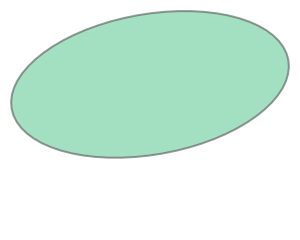

In [25]:
blotch.to_shapely()

## Shapely fans

In [68]:
d = {"x": [817], "y": [551], "spread": [30], "angle": [203], "distance": [306]}

In [69]:
from planet4.markings import Fan
from shapely import geometry as geom

In [70]:
fan = Fan(pd.DataFrame(d).squeeze())

In [71]:
fan_geo = fan.to_shapely()

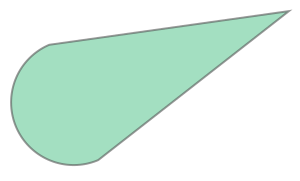

In [72]:
fan_geo

In [73]:
p4id.plot_fans(data=[fan])

FigureCanvasNbAgg()

In [30]:
fan_geo.area

17031.14324999999

In [ ]:
%matplotlib ipympl

In [ ]:
circle = geom.Point(*fan.semi_circle_center).buffer(fan.radius)
circle

In [ ]:
np.array(circle.boundary).shape

The default buffering of shapely creates 66 elements here, therefore I will chose `numsegments` = 100 for now in the `to_shapely` method for Fans.

In [ ]:
plt.figure()
plt.scatter(*circle.boundary.xy, s=1)